In [2]:
# 0201.py
import cv2
import numpy as np

imageFile = './data/lena.jpg'
img  = cv2.imread(imageFile)    # cv2.IMREAD_COLOR
img2 = cv2.imread(imageFile, 0) # cv2.IMREAD_GRAYSCALE

##encode_img = np.fromfile(imageFile, np.uint8)
##img = cv2.imdecode(encode_img, cv2.IMREAD_UNCHANGED)

cv2.imshow('Lena color',img)
cv2.imshow('Lena grayscale',img2)

cv2.waitKey()
cv2.destroyAllWindows()



In [3]:
# 0202.py
import cv2

imageFile = './data/lena.jpg'
img = cv2.imread(imageFile) 
cv2.imwrite('./data/Lena.bmp', img)
cv2.imwrite('./data/Lena.png', img)
cv2.imwrite('./data/Lena2.png',img, [cv2.IMWRITE_PNG_COMPRESSION, 9])
cv2.imwrite('./data/Lena2.jpg', img, [cv2.IMWRITE_JPEG_QUALITY, 90])



True

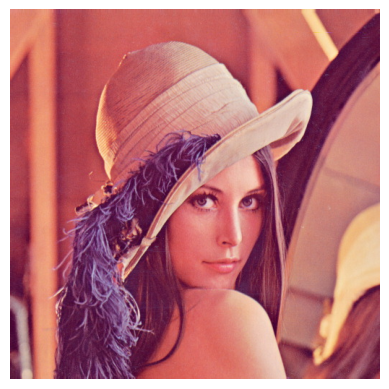

In [4]:
# 0203.py
import cv2
from   matplotlib import pyplot as plt

imageFile = './data/lena.jpg'
imgBGR = cv2.imread(imageFile)
plt.axis('off')

imgRGB = cv2.cvtColor(imgBGR,cv2.COLOR_BGR2RGB)
plt.imshow(imgRGB)
plt.show()


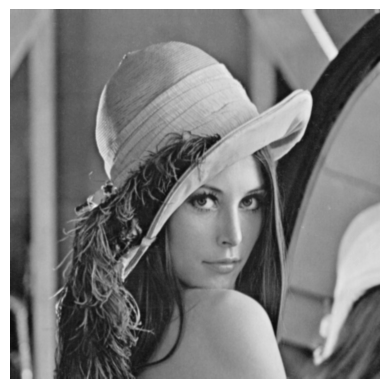

In [5]:
# 0204.py
import cv2
from   matplotlib import pyplot as plt

imageFile = './data/lena.jpg'
imgGray = cv2.imread(imageFile, cv2.IMREAD_GRAYSCALE)
plt.axis('off')

plt.imshow(imgGray, cmap = "gray", interpolation='bicubic')
plt.show()


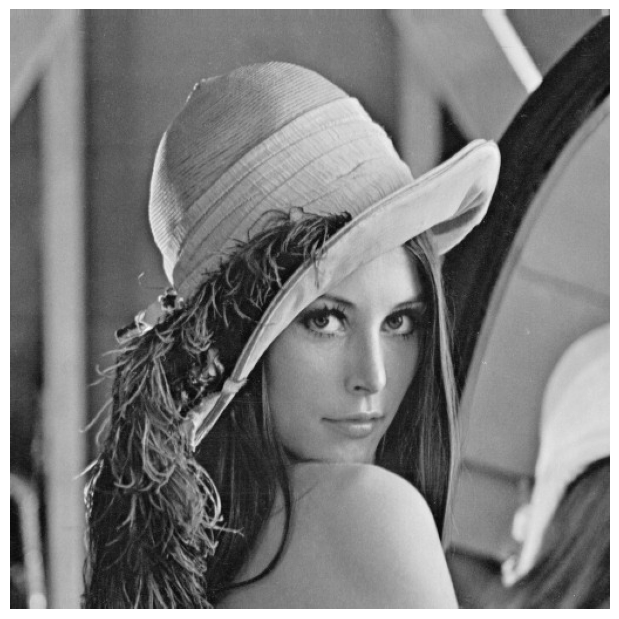

In [6]:
# 0205.py
import cv2
from   matplotlib import pyplot as plt

imageFile = './data/lena.jpg'
imgGray = cv2.imread(imageFile, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(6,6))
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.imshow(imgGray, cmap = 'gray')

plt.axis('off')
plt.savefig('./data/0205.png')
plt.show()


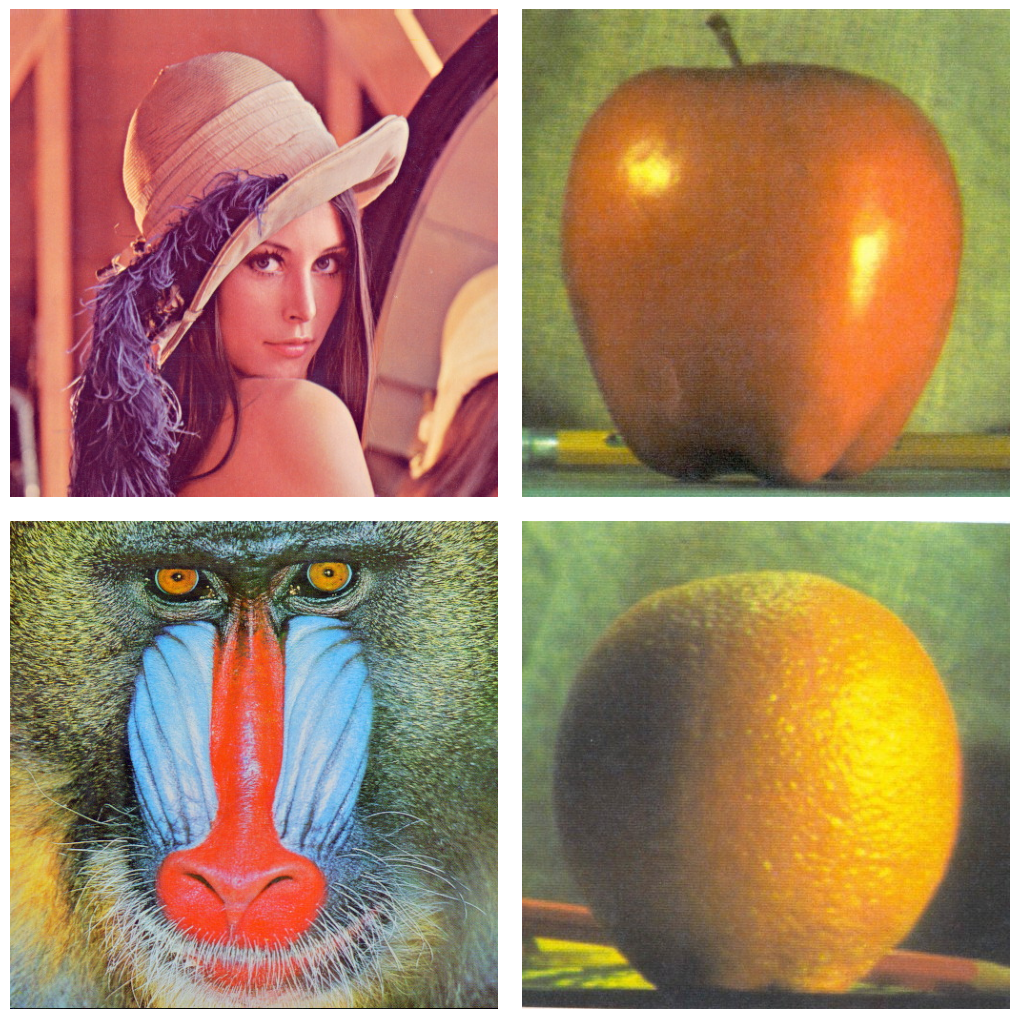

In [7]:
# 0206.py
import cv2
from   matplotlib import pyplot as plt

path = './data/'
imgBGR1 = cv2.imread(path+'lena.jpg')
imgBGR2 = cv2.imread(path+'apple.jpg')
imgBGR3 = cv2.imread(path+'baboon.jpg')
imgBGR4 = cv2.imread(path+'orange.jpg')

imgRGB1 = cv2.cvtColor(imgBGR1, cv2.COLOR_BGR2RGB)
imgRGB2 = cv2.cvtColor(imgBGR2, cv2.COLOR_BGR2RGB)
imgRGB3 = cv2.cvtColor(imgBGR3, cv2.COLOR_BGR2RGB)
imgRGB4 = cv2.cvtColor(imgBGR4, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(2, 2, figsize=(10,10), sharey=True)
fig.canvas.manager.set_window_title('Sample Pictures')

ax[0][0].axis('off')
ax[0][0].imshow(imgRGB1, aspect = 'auto')

ax[0][1].axis('off')
ax[0][1].imshow(imgRGB2, aspect = 'auto')

ax[1][0].axis("off")
ax[1][0].imshow(imgRGB3, aspect = "auto")

ax[1][1].axis("off")
ax[1][1].imshow(imgRGB4, aspect = 'auto')

plt.subplots_adjust(left=0, bottom=0, right=1, top=1,
                    wspace=0.05, hspace=0.05)
plt.savefig("./data/0206.png", bbox_inches='tight')
plt.show()


In [8]:
# 0207.py
import cv2

cap = cv2.VideoCapture(0)  # 0번 카메라
##cap = cv2.VideoCapture('./data/vtest.avi')
##cap.set(cv2.CAP_PROP_FRAME_WIDTH, 320)
##cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 240)

frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),
              int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print('frame_size =', frame_size)

while True:   
    retval, frame = cap.read()
    if not retval:
        break

    cv2.imshow('frame',frame)
    
    key = cv2.waitKey(25)
    if key == 27: # Esc
        break
if cap.isOpened():
    cap.release()
cv2.destroyAllWindows()


frame_size = (0, 0)


In [ ]:
# 0209.py
'''
 pip install youtube_dl
 pip install pafy
'''
import cv2, pafy
url = 'https://www.youtube.com/watch?v=u_Q7Dkl7AIk'
video = pafy.new(url)
print('title = ', video.title)
print('video.rating = ', video.rating)
print('video.duration = ', video.duration)

best = video.getbest() # video.getbest(preftype='mp4')
print('best.resolution', best.resolution)

cap=cv2.VideoCapture(best.url)
while(True):
        retval, frame = cap.read()
        if not retval:
                break
        cv2.imshow('frame',frame)

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        edges = cv2.Canny(gray,100,200)
        cv2.imshow('edges',edges)

        key = cv2.waitKey(25)
        if key == 27: # Esc
                break
cv2.destroyAllWindows()


In [10]:
# 0210.py
import cv2

cap = cv2.VideoCapture(0) # 0번 카메라
frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),
              int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print('frame_size =', frame_size)

#fourcc = cv2.VideoWriter_fourcc(*'DIVX')  # ('D', 'I', 'V', 'X')
fourcc = cv2.VideoWriter_fourcc(*'XVID')

out1 = cv2.VideoWriter('./data/record0.mp4',fourcc, 20.0, frame_size)
out2 = cv2.VideoWriter('./data/record1.mp4',fourcc, 20.0, frame_size,isColor=False)

while True:
    retval, frame = cap.read()
    if not retval:
        break   
    out1.write(frame)
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    out2.write(gray)        
    cv2.imshow('frame',frame)
    cv2.imshow('gray',gray)      
    
    key = cv2.waitKey(25)
    if key == 27:
        break
cap.release()
out1.release()
out2.release()
cv2.destroyAllWindows()


frame_size = (0, 0)


error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


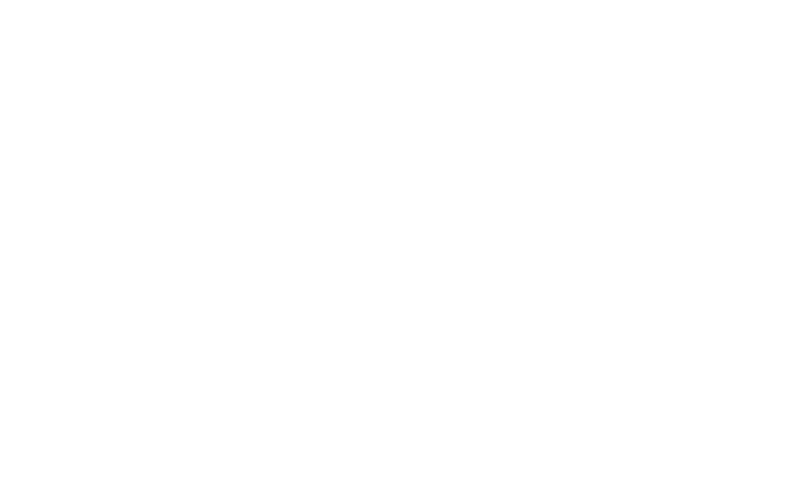

In [11]:
# 0211.py
import cv2
import matplotlib.pyplot as plt

#1
def handle_key_press(event):
    if event.key == 'escape':
        cap.release()
        plt.close()       
def handle_close(evt):
    print('Close figure!')
    cap.release()

#2 프로그램 시작    
cap = cv2.VideoCapture(0) # 0번 카메라

plt.ion() # 대화모드 설정
fig = plt.figure(figsize=(10, 6)) 
plt.axis('off')
#ax = fig.gca()
#ax.set_axis_off()
fig.canvas.manager.set_window_title('Video Capture')
fig.canvas.mpl_connect('key_press_event', handle_key_press)
fig.canvas.mpl_connect('close_event', handle_close)

retval, frame = cap.read() 
im = plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

#3
while True:
    retval, frame = cap.read() 
    if not retval:
        break       
#    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    im.set_array(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    fig.canvas.draw()
#   fig.canvas.draw_idle()
    fig.canvas.flush_events()  # plt.pause(0.001)
if cap.isOpened():
    cap.release()


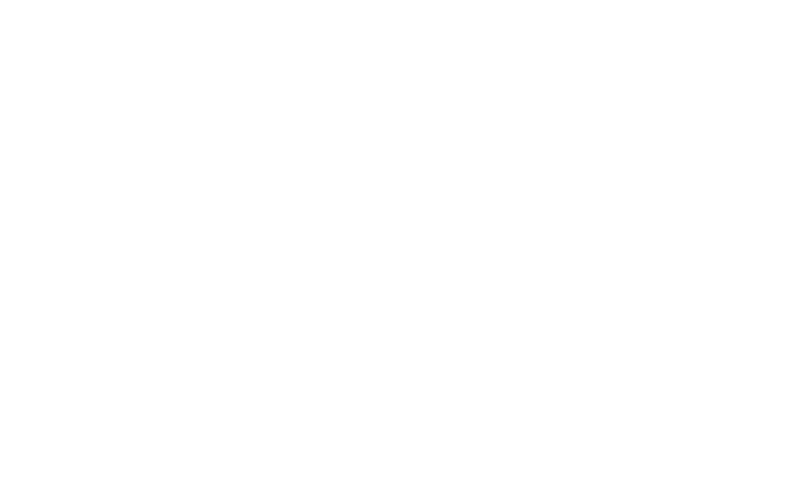

In [12]:
# 0212.py
import cv2
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# 프로그램 시작    
cap = cv2.VideoCapture(0)
fig = plt.figure(figsize=(10, 6)) # fig.set_size_inches(10, 6)
fig.canvas.manager.set_window_title('Video Capture')
plt.axis('off')

def init():
    global im
    retval, frame = cap.read() # 첫 프레임 캡처
    im = plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
##    return im,

def updateFrame(k): 
    retval, frame = cap.read()
    if retval:
        im.set_array(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

ani = animation.FuncAnimation(fig, updateFrame, init_func=init, interval=50)
plt.show()
if cap.isOpened():
    cap.release()


error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


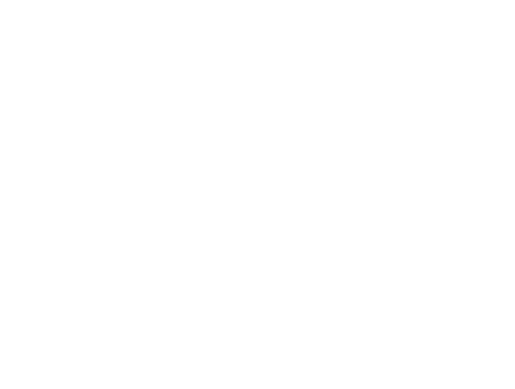

In [13]:
# 0213.py
import cv2
import matplotlib.pyplot as plt
import matplotlib.animation as animation
 
class Video:
    def __init__(self, device=0):
        self.cap = cv2.VideoCapture(device)
        self.retval, self.frame = self.cap.read()
        self.im = plt.imshow(cv2.cvtColor(self.frame, cv2.COLOR_BGR2RGB))
        print('start capture ...')
       
    def updateFrame(self, k):
        self.retval, self.frame = self.cap.read()
        self.im.set_array(cv2.cvtColor(camera.frame, cv2.COLOR_BGR2RGB))
#       return self.im,

    def close(self):
        if self.cap.isOpened():
            self.cap.release()
        print('finish capture.')

# 프로그램 시작 
fig = plt.figure()
fig.canvas.manager.set_window_title('Video Capture')
plt.axis("off")

camera = Video()
##camera = Video('./data/vtest.avi')
ani = animation.FuncAnimation(fig, camera.updateFrame, interval=50)
plt.show()
camera.close()


start capture ...


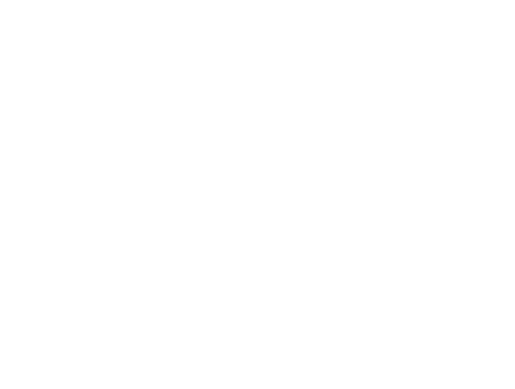

finish capture.


In [14]:
# 0214.py
import cv2
import matplotlib.pyplot as plt
import matplotlib.animation as animation
 
class Video(animation.FuncAnimation):
    def __init__(self, device=0, fig=None, frames=None,
                       interval=50, repeat_delay=5, blit=False, **kwargs):

        if fig is None:
            self.fig = plt.figure()
            self.fig.canvas.manager.set_window_title('Video Capture')
            plt.axis("off")
            
        super(Video, self).__init__(self.fig, self.updateFrame, init_func=self.init,
                                    frames=frames, interval=interval, blit=blit,
                                    repeat_delay=repeat_delay, **kwargs)        
        self.cap = cv2.VideoCapture(device)
        print("start capture ...")
        
    def init(self): 
        retval, self.frame = self.cap.read()
        if retval:
            self.im = plt.imshow(cv2.cvtColor(self.frame, cv2.COLOR_BGR2RGB))
                    
    def updateFrame(self, k):
        retval, self.frame = self.cap.read()
        if retval:
            self.im.set_array(cv2.cvtColor(camera.frame, cv2.COLOR_BGR2RGB))
#       return self.im,
       
    def close(self):
        if self.cap.isOpened():
            self.cap.release()
        print("finish capture.")

# 프로그램 시작 
camera = Video()
##camera = Video('./data/vtest.avi')
plt.show()
camera.close()


start capture ...


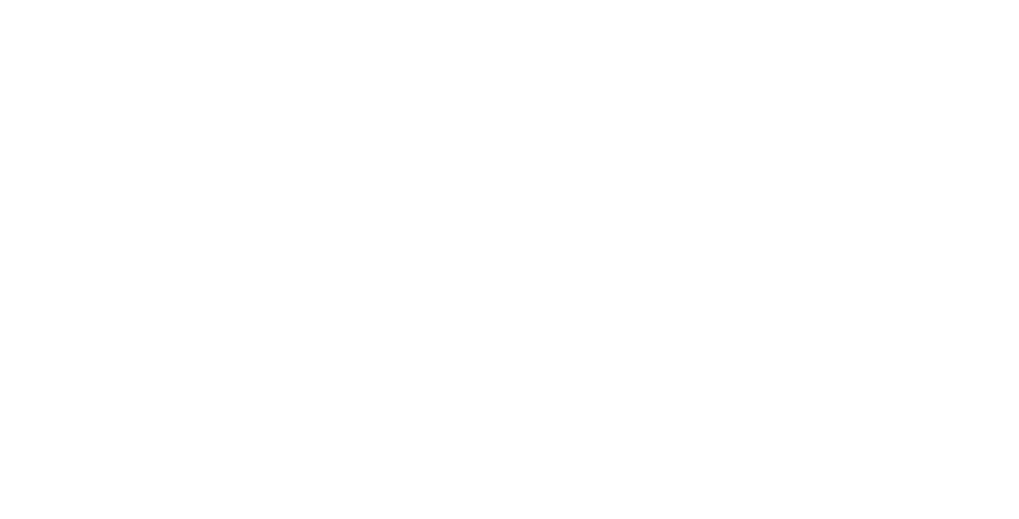

finish capture.


In [15]:
# 0215.py
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
 
class Video(animation.FuncAnimation):
    def __init__(self, device=0, fig=None, frames=None,
                       interval=80, repeat_delay=5, blit=False, **kwargs):
        if fig is None:
            self.fig, self.ax = plt.subplots(1, 2, figsize=(10,5))
            self.fig.canvas.manager.set_window_title('Video Capture')
            self.ax[0].set_position([0, 0, 0.5, 1])
            self.ax[0].axis('off')

            self.ax[1].set_position([0.5, 0, 0.5, 1])
            self.ax[1].axis('off')
##            plt.subplots_adjust(left=0,bottom=0,right=1,top=1,
##                                wspace=0.05,hspace=0.05)
            
        super(Video, self).__init__(self.fig, self.updateFrame, init_func=self.init,
                                   frames=frames, interval=interval, blit=blit,
                                   repeat_delay=repeat_delay, **kwargs)        
        self.cap = cv2.VideoCapture(device)
        print('start capture ...')
        
    def init(self): 
        retval, self.frame = self.cap.read()
        if retval:
            self.im0 = self.ax[0].imshow(cv2.cvtColor(self.frame, cv2.COLOR_BGR2RGB),
                                      aspect = 'auto')
            self.im1 = self.ax[1].imshow(np.zeros(self.frame.shape, self.frame.dtype),
                                      aspect = 'auto')                    
    def updateFrame(self, k):
        retval, self.frame = self.cap.read()
        if retval:
            self.im0.set_array(cv2.cvtColor(self.frame, cv2.COLOR_BGR2RGB))

            gray = cv2.cvtColor(self.frame, cv2.COLOR_BGR2GRAY)
            self.im1.set_array(cv2.merge((gray,gray,gray)))
            
    def close(self):
        if self.cap.isOpened():
            self.cap.release()
        print('finish capture.')


# 프로그램 시작 
camera = Video()
plt.show()
camera.close()


In [16]:
#0301.py
import cv2
import numpy as np

img = np.zeros(shape=(512,512,3), dtype=np.uint8) + 255
#img = np.ones((512,512,3), np.uint8) * 255
#img = np.full((512,512,3), (255, 255, 255), dtype= np.uint8)
#img = np.zeros((512,512, 3), np.uint8) # Black 배경
pt1 = 100, 100
pt2 = 400, 400
cv2.rectangle(img, pt1, pt2, (0, 255, 0), 2)

cv2.line(img, (0, 0), (500, 0), (255, 0, 0), 5)
cv2.line(img, (0, 0), (0, 500), (0,0,255), 5)

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()


In [17]:
# 0302.py
import cv2
import numpy as np

img = np.zeros(shape=(512,512,3), dtype=np.uint8) + 255

x1, x2 = 100, 400
y1, y2 = 100, 400
cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255))

pt1 = 120, 50
pt2 = 300, 500
cv2.line(img, pt1, pt2, (255,0,0), 2)

imgRect = (x1, y1, x2-x1, y2-y1)
retval, rpt1, rpt2 = cv2.clipLine(imgRect, pt1, pt2)
if retval:
    cv2.circle(img, rpt1, radius=5, color=(0, 255, 0), thickness=-1)
    cv2.circle(img, rpt2, radius=5, color=(0, 255, 0), thickness=-1)

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()


In [18]:
#0303.py
import cv2
import numpy as np

img = np.zeros(shape=(512,512,3), dtype=np.uint8) + 255
cy = img.shape[0]//2
cx = img.shape[1]//2

for r in range(200, 0, -100):
    cv2.circle(img, (cx, cy), r, color=(255, 0, 0))

cv2.circle(img, (cx, cy), radius=50, color=(0, 0, 255), thickness=-1)

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()


In [19]:
#0304.py
import cv2
import numpy as np

img = np.zeros(shape=(512,512,3), dtype=np.uint8) + 255
ptCenter = img.shape[1]//2, img.shape[0]//2
size = 200,100

cv2.ellipse(img, ptCenter, size, 0, 0, 360, (255, 0, 0))
cv2.ellipse(img, ptCenter, size, 45, 0, 360, (0, 0, 255))

box = (ptCenter, size, 0)
cv2.ellipse(img, box,  (255, 0, 0), 5)

box = (ptCenter, size, 45)
cv2.ellipse(img, box,  (0, 0, 255), 5)

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()


In [20]:
#0305.py
import cv2
import numpy as np

img = np.zeros(shape=(512,512,3), dtype=np.uint8) + 255

pts1 = np.array([[100, 100], [200, 100], [200, 200], [100, 200]])
pts2 = np.array([[300, 200], [400, 100], [400, 200]])

cv2.polylines(img, [pts1, pts2], isClosed=True, color=(255, 0, 0))

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()


In [21]:
#0306.py
import cv2
import numpy as np

img = np.zeros(shape=(512,512,3), dtype=np.uint8) + 255

ptCenter = img.shape[1]//2, img.shape[0]//2
size = 200,100

cv2.ellipse(img, ptCenter, size, 0, 0, 360, (255, 0, 0))
pts1 = cv2.ellipse2Poly(ptCenter, size,  0, 0, 360, delta=45)

cv2.ellipse(img, ptCenter, size, 45, 0, 360, (255, 0, 0))
pts2 = cv2.ellipse2Poly(ptCenter, size, 45, 0, 360, delta=45)

cv2.polylines(img, [pts1, pts2], isClosed=True, color=(0, 0, 255))

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()


In [22]:
#0307.py
import cv2
import numpy as np

img = np.zeros(shape=(512,512,3), dtype=np.uint8) + 255

x, y = 256, 256
size = 200

for angle in range(0, 90, 10):
    rect = ((256, 256), (size, size), angle)
    box = cv2.boxPoints(rect).astype(np.int32)
    r = np.random.randint(256)
    g = np.random.randint(256)
    b = np.random.randint(256)   
    cv2.polylines(img, [box], True, (b, g, r), 2)
    
cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()


In [23]:
#0308.py
import cv2
import numpy as np

img = np.zeros(shape=(512,512,3), dtype=np.uint8) + 255

pts1 = np.array([[100, 100], [200, 100], [200, 200], [100, 200]])
pts2 = np.array([[300, 200], [400, 100], [400, 200]])

cv2.fillConvexPoly(img, pts1, color=(255, 0, 0))

cv2.fillPoly(img, [pts2], color=(0, 0, 255))
#cv2.fillPoly(img, [pts1, pts2], color=(0, 0, 255))

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()


In [24]:
#0309.py
import numpy as np
import cv2

img = np.zeros(shape=(512,512,3), dtype=np.uint8) + 255
text = 'OpenCV Programming'
org = (50,100)
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,text, org, font, 1, (255,0,0), 2)

size, baseLine = cv2.getTextSize(text, font, 1, 2)
#print('size=', size)
#print('baseLine=', baseLine)
cv2.rectangle(img, org, (org[0]+size[0], org[1]-size[1]), (0, 0, 255))
cv2.circle(img, org, 3, (0, 255,0), 2)

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()


In [25]:
#0310.py
import numpy as np
import cv2

width, height = 512, 512
x, y, R = 256, 256, 50
direction = 0 # right

while True:   
    key = cv2.waitKeyEx(30)    
    if key == 0x1B: 
        break;
    
# 방향키 방향전환 
    elif key == 0x270000: # right
        direction = 0
    elif key == 0x280000: # down
        direction = 1
    elif key == 0x250000: # left
        direction = 2
    elif key == 0x260000: # up
        direction = 3
        
# 방향으로 이동 
    if direction == 0:     # right
        x += 10
    elif direction == 1:   # down
        y += 10
    elif direction == 2:   # left
        x -= 10
    else: # 3, up
        y -= 10
        
#   경계확인 
    if x < R:
        x = R
        direction = 0
    if x > width - R:
        x = width - R
        direction = 2
    if y < R:
        y = R
        direction = 1
    if y > height - R:
        y = height - R
        direction = 3
        
# 지우고, 그리기        
    img = np.zeros((width, height,3), np.uint8) + 255 # 지우기
    cv2.circle(img, (x, y), R, (0, 0, 255), -1) 
    cv2.imshow('img', img)
    
cv2.destroyAllWindows()


In [26]:
#0311.py
import numpy as np
import cv2

def onMouse(event, x, y, flags, param):
##    global img
    if event == cv2.EVENT_LBUTTONDOWN:
        if flags & cv2.EVENT_FLAG_SHIFTKEY:
            cv2.rectangle(param[0], (x-5, y-5), (x+5, y+5), (255, 0, 0))
        else:
            cv2.circle(param[0], (x, y), 5, (255, 0, 0), 3)
    elif event == cv2.EVENT_RBUTTONDOWN:
        cv2.circle(param[0], (x, y), 5, (0, 0, 255), 3)        
    elif event == cv2.EVENT_LBUTTONDBLCLK:
        param[0] = np.zeros(param[0].shape, np.uint8) + 255   
    cv2.imshow("img", param[0])
    
img = np.zeros((512,512,3), np.uint8) + 255
cv2.imshow('img', img)
cv2.setMouseCallback('img', onMouse, [img])
cv2.waitKey()
cv2.destroyAllWindows()


In [27]:
# 0312.py
import numpy as np
import cv2

def onChange(pos): 
    global img
    r = cv2.getTrackbarPos('R','img')
    g = cv2.getTrackbarPos('G','img')
    b = cv2.getTrackbarPos('B','img')                   
    img[:] = (b, g, r)
    cv2.imshow('img', img)

img = np.zeros((512, 512, 3), np.uint8)
cv2.imshow('img',img)

# 트랙바 생성
cv2.createTrackbar('R', 'img', 0, 255, onChange)
cv2.createTrackbar('G', 'img', 0, 255, onChange)
cv2.createTrackbar('B', 'img', 0, 255, onChange)

# 트랙바 위치 초기화
#cv2.setTrackbarPos('R', 'img', 0)
#cv2.setTrackbarPos('G', 'img', 0)
cv2.setTrackbarPos('B', 'img', 255)

cv2.waitKey()
cv2.destroyAllWindows()


In [28]:
# 0401.py
import cv2
import numpy as np

img = cv2.imread('./data/lena.jpg') # cv2.IMREAD_COLOR
##img = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)

print('img.ndim=', img.ndim)
print('img.shape=', img.shape)
print('img.dtype=', img.dtype)

## np.bool, np.uint16, np.uint32, np.float32, np.float64, np.complex64
img=img.astype(np.int32)
print('img.dtype=',img.dtype)

img=np.uint8(img)
print('img.dtype=',img.dtype)


img.ndim= 3
img.shape= (512, 512, 3)
img.dtype= uint8
img.dtype= int32
img.dtype= uint8


In [29]:
# 0402.py
import cv2
##import numpy as np

img = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)
print('img.shape=', img.shape)

##img = img.reshape(img.shape[0]*img.shape[1])
img = img.flatten()
print('img.shape=', img.shape)

img = img.reshape(-1, 512, 512)
print('img.shape=', img.shape)

cv2.imshow('img', img[0])
cv2.waitKey()
cv2.destroyAllWindows()


img.shape= (512, 512)
img.shape= (262144,)
img.shape= (1, 512, 512)


In [30]:
# 0403.py
import cv2
##import numpy as np

img = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)
img[100, 200] = 0  
print(img[100:110, 200:210]) 

##for y in range(100, 400):
##    for x in range(200, 300):
##        img[y, x] = 0

img[100:400, 200:300] = 0 

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()


[[  0 143 145 132 147 144 142 139 132 138]
 [138 138 143 151 137 144 139 139 138 138]
 [132 139 153 140 133 136 143 138 137 128]
 [137 146 138 125 132 145 139 142 130 128]
 [149 139 130 137 140 145 136 133 132 141]
 [141 139 134 149 149 137 132 127 140 140]
 [142 148 139 142 144 138 146 135 131 130]
 [151 146 136 131 142 144 149 135 126 132]
 [147 131 135 138 147 139 128 125 134 138]
 [135 132 149 142 134 128 122 135 138 129]]


In [31]:
# 0404.py
import cv2
##import numpy as np

img = cv2.imread('./data/lena.jpg') # cv2.IMREAD_COLOR
img[100, 200] = [255, 0, 0]  # 컬러(BGR) 변경
print(img[100, 200:210]) # ROI 접근

##for y in range(100, 400):
##    for x in range(200, 300):
##        img[y, x] = [255, 0, 0]    # 파랑색(blue)으로 변경

img[100:400, 200:300] = [255, 0, 0]  # ROI 접근
    
cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()


[[255   0   0]
 [116 115 207]
 [120 116 211]
 [107 103 198]
 [119 121 209]
 [116 118 206]
 [115 114 206]
 [112 111 203]
 [104 105 195]
 [110 112 200]]


In [32]:
# 0405.py
import cv2
##import numpy as np

img = cv2.imread('./data/lena.jpg')

##for y in range(100, 400):
##    for x in range(200, 300):
##        img[y, x, 0] = 255      
        
img[100:400, 200:300, 0] = 255 
img[100:400, 300:400, 1] = 255
img[100:400, 400:500, 2] = 255

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()


In [33]:
# 0406.py
import cv2
import numpy as np

src = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)
dst = np.zeros(src.shape, dtype=src.dtype)

N = 4 # 8, 32, 64
height, width = src.shape
##height, width, channel = src.shape

h = height // N
w = width  // N
for i in range(N):
    for j in range(N):
        y = i*h
        x = j*w       
        roi = src[y:y+h, x:x+w]
        dst[y:y+h, x:x+w] = cv2.mean(roi)[0]
##        dst[y:y+h, x:x+w] = cv2.mean(roi)[0:3]
        
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()


In [34]:
# 0407.py
import cv2
 
src = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)
roi = cv2.selectROI(src)
print('roi =', roi)

if roi != (0, 0, 0, 0):
    img = src[roi[1]:roi[1]+roi[3],
               roi[0]:roi[0]+roi[2]]

    cv2.imshow('Img', img)
    cv2.waitKey()
    
cv2.destroyAllWindows()


roi = (0, 0, 0, 0)


In [35]:
# 0408.py
import cv2
 
src = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)
rects = cv2.selectROIs('src', src, False, True)
print('rects =', rects)

for r in rects:
    cv2.rectangle(src, (r[0], r[1]), (r[0]+r[2], r[1]+r[3]), 255)    
##    img = src[r[1]:r[1]+r[3], r[0]:r[0]+r[2]]
##    cv2.imshow('Img', img)
##    cv2.waitKey()

cv2.imshow('src', src)
cv2.waitKey()    
cv2.destroyAllWindows()


rects = [[123 199 192 160]
 [123 199 192 160]]


In [36]:
# 0409.py
import cv2
src = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)

##dst = src          
dst = src.copy()
dst[100:400, 200:300] = 0

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()    
cv2.destroyAllWindows()


In [37]:
# 0410.py
import cv2
import numpy as np
 
src = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)
shape = src.shape[0], src.shape[1], 3
dst = np.zeros(shape, dtype=np.uint8)

dst[:,:,0] = src  
##dst[:,:,1] = src 
##dst[:,:,2] = src

dst[100:400, 200:300, :] = [255, 255, 255]

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()    
cv2.destroyAllWindows()


In [38]:
# 0411.py
import cv2
src = cv2.imread('./data/lena.jpg')

dst = cv2.split(src) 
print(type(dst))
print(type(dst[0])) # type(dst[1]), type(dst[2])

cv2.imshow('blue',  dst[0])
cv2.imshow('green', dst[1])
cv2.imshow('red',   dst[2])
cv2.waitKey()    
cv2.destroyAllWindows()


<class 'tuple'>
<class 'numpy.ndarray'>


In [39]:
# 0412.py
import cv2
src = cv2.imread('./data/lena.jpg')

b, g, r = cv2.split(src)
dst = cv2.merge([b, g, r]) 

print(type(dst))
print(dst.shape)
cv2.imshow('dst',  dst)
cv2.waitKey()    
cv2.destroyAllWindows()


<class 'numpy.ndarray'>
(512, 512, 3)


In [40]:
# 0413.py
import cv2
src = cv2.imread('./data/lena.jpg')

gray   = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
yCrCv = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
hsv    = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

cv2.imshow('gray',  gray)
cv2.imshow('yCrCv', yCrCv)
cv2.imshow('hsv',   hsv)

cv2.waitKey()    
cv2.destroyAllWindows()


In [41]:
# 0414.py
import cv2
import numpy as np
src = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)

dst = cv2.resize(src, dsize=(320, 240))
dst2 = cv2.resize(src, dsize=(0,0), fx=1.5, fy=1.2)

cv2.imshow('dst', dst)
cv2.imshow('dst2', dst2)
cv2.waitKey()    
cv2.destroyAllWindows()


In [42]:
# 0415.py
import cv2
src = cv2.imread('./data/lena.jpg')

dst1 = cv2.rotate(src, cv2.ROTATE_90_CLOCKWISE)
dst2 = cv2.rotate(src, cv2.ROTATE_90_COUNTERCLOCKWISE)

cv2.imshow('dst1',  dst1)
cv2.imshow('dst2',  dst2)
cv2.waitKey()    
cv2.destroyAllWindows()


In [43]:
# 0416.py
import cv2
src = cv2.imread('./data/lena.jpg')

rows, cols, channels = src.shape
M1 = cv2.getRotationMatrix2D( (rows/2, cols/2),  45, 0.5 )
M2 = cv2.getRotationMatrix2D( (rows/2, cols/2), -45, 1.0 )

dst1 = cv2.warpAffine( src, M1, (rows, cols))
dst2 = cv2.warpAffine( src, M2, (rows, cols))

cv2.imshow('dst1',  dst1)
cv2.imshow('dst2',  dst2)
cv2.waitKey()    
cv2.destroyAllWindows()


In [44]:
# 0417.py
import cv2
import numpy as np

src1 = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)
src2 = np.zeros(shape=(512,512), dtype=np.uint8) + 100

dst1 = src1 + src2
dst2 = cv2.add(src1, src2)
#dst2 = cv2.add(src1, src2, dtype = cv2.CV_8U)

cv2.imshow('dst1',  dst1)
cv2.imshow('dst2',  dst2)
cv2.waitKey()    
cv2.destroyAllWindows()


In [45]:
# 0418.py: OpenCV-Python Tutorials 참조
import cv2
import numpy as np

src1 = cv2.imread('./data/lena.jpg')
src2 = cv2.imread('./data/opencv_logo.png')
cv2.imshow('src2',  src2)

#1
rows,cols,channels = src2.shape
roi = src1[0:rows, 0:cols]

#2
gray = cv2.cvtColor(src2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(gray, 160, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
cv2.imshow('mask',  mask)
cv2.imshow('mask_inv',  mask_inv)

#3
src1_bg = cv2.bitwise_and(roi, roi, mask = mask)
cv2.imshow('src1_bg',  src1_bg)

#4
src2_fg = cv2.bitwise_and(src2, src2, mask = mask_inv)
cv2.imshow('src2_fg',  src2_fg)

#5
##dst = cv2.add(src1_bg, src2_fg)
dst = cv2.bitwise_or(src1_bg, src2_fg)
cv2.imshow('dst',  dst)

#6
src1[0:rows, 0:cols] = dst

cv2.imshow('result',src1)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [46]:
# 0419.py
import cv2
import numpy as np

src1 = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)
src2 = np.zeros(shape=(512,512), dtype=np.uint8)+255

dst1 = 255 - src1
dst2 = cv2.subtract(src2, src1)
dst3 = cv2.compare(dst1, dst2, cv2.CMP_NE)
n    = cv2.countNonZero(dst3)
print('n = ', n)

cv2.imshow('dst1',  dst1)
cv2.imshow('dst2',  dst2)
cv2.waitKey()    
cv2.destroyAllWindows()


n =  0


In [47]:
# 0420.py
import cv2
import numpy as np

src = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)

minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(src)
print('src:', minVal, maxVal, minLoc, maxLoc)

dst = cv2.normalize(src, None, 100, 200, cv2.NORM_MINMAX)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(dst)
print('dst:', minVal, maxVal, minLoc, maxLoc)

cv2.imshow('dst',  dst)
cv2.waitKey()    
cv2.destroyAllWindows()


src: 18.0 248.0 (265, 198) (116, 273)
dst: 100.0 200.0 (265, 198) (116, 273)


In [48]:
# 0421.py
import cv2
import numpy as np
import time

dst = np.full((512,512,3), (255, 255, 255), dtype= np.uint8)
nPoints = 100
pts = np.zeros((1, nPoints, 2), dtype=np.uint16)

cv2.setRNGSeed(int(time.time()))
cv2.randu(pts, (0, 0), (512, 512))
            
# draw points
for k in range(nPoints):
    x, y = pts[0, k][:] # pts[0, k, :]
    cv2.circle(dst,(x,y),radius=5,color=(0,0,255),thickness=-1)
    
cv2.imshow('dst',  dst)
cv2.waitKey()    
cv2.destroyAllWindows()


In [49]:
# 0422.py
import cv2
import numpy as np
import time

dst = np.full((512,512,3), (255, 255, 255), dtype= np.uint8)
nPoints = 100
pts = np.zeros((1, nPoints, 2), dtype=np.uint16)

cv2.setRNGSeed(int(time.time()))
cv2.randn(pts, mean=(256, 256), stddev=(50, 50))
            
# draw points
for k in range(nPoints):
    x, y = pts[0][k, :] # pts[0, k, :]
    cv2.circle(dst,(x,y),radius=5,color=(0,0,255),thickness=-1)
    
cv2.imshow('dst', dst)                
cv2.waitKey()    
cv2.destroyAllWindows()


In [50]:
# 0423.py
import cv2
import numpy as np

X = np.array([[0, 0,  0,100,100,150, -100,-150],
              [0,50,-50,  0, 30,100,  -20,-100]], dtype=np.float64)
X = X.transpose() # X = X.T

cov, mean = cv2.calcCovarMatrix(X, mean=None, 
                               flags = cv2.COVAR_NORMAL + cv2.COVAR_ROWS)
print('mean=', mean)
print('cov=', cov)

ret, icov = cv2.invert(cov)
print('icov=',icov)

v1 = np.array([[0],[0]] , dtype=np.float64)
v2 = np.array([[0],[50]], dtype=np.float64)

dist = cv2.Mahalanobis(v1, v2, icov)
print('dist = ', dist)
                
cv2.waitKey()    
cv2.destroyAllWindows()


mean= [[12.5   1.25]]
cov= [[73750.  34875. ]
 [34875.  26287.5]]
icov= [[ 3.63872307e-05 -4.82740722e-05]
 [-4.82740722e-05  1.02084955e-04]]
dist =  0.5051854992128457


In [51]:
# 0424.py
import cv2
import numpy as np
 
X = np.array([[0, 0,  0,100,100,150, -100,-150],
                 [0,50,-50,  0, 30,100,  -20,-100]], dtype=np.float64)
X = X.transpose() # X = X.T

cov, mean = cv2.calcCovarMatrix(X, mean=None,
                                    flags=cv2.COVAR_NORMAL+cv2.COVAR_ROWS)
ret, icov = cv2.invert(cov)

dst = np.full((512,512,3), (255, 255, 255), dtype= np.uint8)
rows, cols, channel = dst.shape
centerX = cols//2
centerY = rows//2

v2 = np.zeros((1,2), dtype=np.float64)
FLIP_Y = lambda y: rows - 1 - y

# draw Mahalanobis distance
for y in range(rows):
    for x in range(cols):
        v2[0,0] = x - centerX
        v2[0,1] = FLIP_Y(y) - centerY # y-축 뒤집기 
        dist = cv2.Mahalanobis(mean, v2, icov)
        if dist < 0.1:
            dst[y, x] = [50, 50, 50]
        elif dist < 0.3:
            dst[y, x] = [100, 100, 100]
        elif dist < 0.8:
            dst[y, x] = [200, 200, 200]
        else:
            dst[y, x] = [250, 250, 250]
            
for k in range(X.shape[0]):
    x, y = X[k,:]
    cx = int(x+centerX)
    cy = int(y+centerY)
    cy = FLIP_Y(cy)
    cv2.circle(dst,(cx,cy),radius=5,color=(0,0,255),thickness=-1)
    
# draw X, Y-axes
cv2.line(dst, (0, 256), (cols-1, 256), (0, 0, 0))
cv2.line(dst, (256,0), (256,rows), (0, 0, 0))

# calculate eigen vectors
ret, eVals, eVects = cv2.eigen(cov)
print('eVals=',  eVals)
print('eVects=', eVects)

def ptsEigenVector(eVal, eVect):
##    global mX, centerX, centerY
    scale = np.sqrt(eVal) # eVal[0]
    x1 = scale*eVect[0]
    y1 = scale*eVect[1]
    x2, y2 = -x1, -y1 # 대칭

    x1 += mean[0,0] + centerX
    y1 += mean[0,1] + centerY
    x2 += mean[0,0] + centerX
    y2 += mean[0,1] + centerY
    y1 = FLIP_Y(y1)
    y2 = FLIP_Y(y2)
    return int(x1), int(y1), int(x2), int(y2)

 
# draw eVects[0]
x1, y1, x2, y2 = ptsEigenVector(eVals[0], eVects[0])
cv2.line(dst, (x1, y1), (x2, y2), (255, 0, 0), 2)

# draw eVects[1]
x1, y1, x2, y2 = ptsEigenVector(eVals[1], eVects[1])
cv2.line(dst, (x1, y1), (x2, y2), (255, 0, 0), 2)

cv2.imshow('dst', dst)               
cv2.waitKey()    
cv2.destroyAllWindows()


eVals= [[92202.13359547]
 [ 7835.36640453]]
eVects= [[ 0.88390424  0.46766793]
 [-0.46766793  0.88390424]]


In [52]:
# 0425.py
import cv2
import numpy as np

X = np.array([[0, 0,  0,100,100,150, -100,-150],
                 [0,50,-50,  0, 30,100,  -20,-100]], dtype=np.float64)
X = X.transpose() # X = X.T

##mean = cv2.reduce(X, 0, cv2.REDUCE_AVG)
##print('mean = ', mean)

mean, eVects = cv2.PCACompute(X, mean=None)
print('mean = ', mean)
print('eVects = ', eVects)

Y =cv2.PCAProject(X, mean, eVects)
print('Y = ', Y)

X2 =cv2.PCABackProject(Y, mean, eVects)
print('X2 = ', X2)
print(np.allclose(X, X2))
cv2.waitKey()    
cv2.destroyAllWindows()


mean =  [[12.5   1.25]]
eVects =  [[ 0.88390424  0.46766793]
 [-0.46766793  0.88390424]]
Y =  [[ -11.63338792    4.74096885]
 [  11.75000868   48.93618085]
 [ -35.01678451  -39.45424315]
 [  76.75703609  -42.02582434]
 [  90.78707404  -15.50869713]
 [ 167.71904127   22.98120308]
 [-109.37717055   33.82967723]
 [-190.9858171   -13.49926538]]
X2 =  [[ 1.77635684e-15  0.00000000e+00]
 [ 3.55271368e-15  5.00000000e+01]
 [ 0.00000000e+00 -5.00000000e+01]
 [ 1.00000000e+02 -7.10542736e-15]
 [ 1.00000000e+02  3.00000000e+01]
 [ 1.50000000e+02  1.00000000e+02]
 [-1.00000000e+02 -2.00000000e+01]
 [-1.50000000e+02 -1.00000000e+02]]
True


In [53]:
# 0426.py
import cv2
import numpy as np

src = cv2.imread('./data/lena.jpg') 
b, g, r = cv2.split(src) 
cv2.imshow('b', b)
cv2.imshow('g', g)
cv2.imshow('r', r)

X = src.reshape(-1, 3)
print('X.shape=', X.shape)

mean, eVects = cv2.PCACompute(X, mean=None)
print('mean = ', mean)
print('eVects = ', eVects)

Y =cv2.PCAProject(X, mean, eVects)
Y = Y.reshape(src.shape)
print('Y.shape=', Y.shape)

eImage = list(cv2.split(Y))
for i in range(3):
    cv2.normalize(eImage[i], eImage[i], 0, 255, cv2.NORM_MINMAX)
    eImage[i]=eImage[i].astype(np.uint8)
    
cv2.imshow('eImage[0]', eImage[0])
cv2.imshow('eImage[1]', eImage[1])
cv2.imshow('eImage[2]', eImage[2])
cv2.waitKey()    
cv2.destroyAllWindows()


X.shape= (262144, 3)
mean =  [[105.39899  99.5627  179.7303 ]]
eVects =  [[ 0.3958077   0.68919426  0.6069166 ]
 [-0.6352216  -0.27180612  0.72292113]
 [ 0.6631967  -0.6716642   0.3302081 ]]
Y.shape= (512, 512, 3)


In [54]:
# 0501.py
import cv2
import numpy as np
src = cv2.imread('./data/heart10.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imshow('src',  src)

ret, dst = cv2.threshold(src, 120, 255, cv2.THRESH_BINARY)
print('ret=', ret)
cv2.imshow('dst',  dst)

ret2, dst2 = cv2.threshold(src, 200, 255,
                             cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print('ret2=', ret2)
cv2.imshow('dst2',  dst2)

cv2.waitKey()    
cv2.destroyAllWindows()


ret= 120.0
ret2= 175.0


In [55]:
# 0502.py
import cv2
import numpy as np
src = cv2.imread('./data/srcThreshold.png', cv2.IMREAD_GRAYSCALE)
cv2.imshow('src',  src)

ret, dst = cv2.threshold(src, 0, 255,
                             cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv2.imshow('dst',  dst)

dst2 = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                            cv2.THRESH_BINARY, 51, 7)
cv2.imshow('dst2',  dst2)

dst3 = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                            cv2.THRESH_BINARY, 51, 7)
cv2.imshow('dst3',  dst3)

cv2.waitKey()    
cv2.destroyAllWindows()


In [56]:
# 0503.py
import cv2
import numpy as np

src = np.array([[0, 0, 0, 0],
              [1, 1, 3, 5],
              [6, 1, 1, 3],
              [4, 3, 1, 7]
              ], dtype=np.uint8)

hist1 = cv2.calcHist(images=[src], channels=[0], mask=None,
                    histSize=[4], ranges=[0, 8])
print('hist1 = ', hist1)

hist2 = cv2.calcHist(images=[src], channels=[0], mask=None,
                    histSize=[4], ranges=[0, 4])
print('hist2 = ', hist2)


hist1 =  [[9.]
 [3.]
 [2.]
 [2.]]
hist2 =  [[4.]
 [5.]
 [0.]
 [3.]]


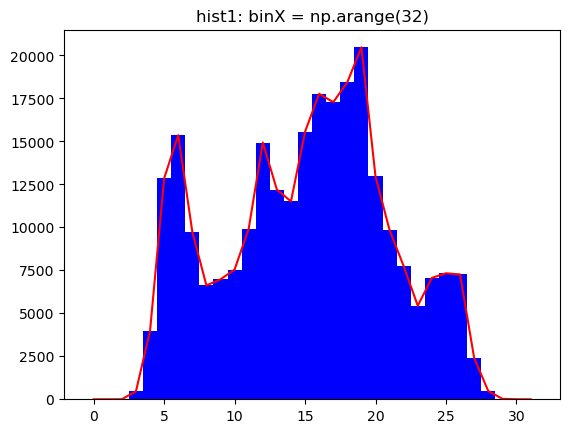

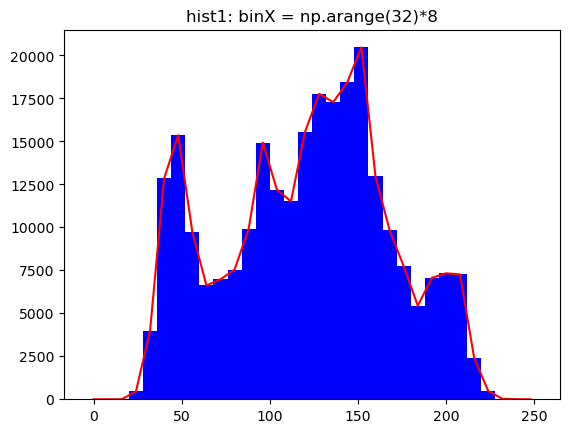

C:\Users\munin\anaconda\lib\site-packages\matplotlib\animation.py:887: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


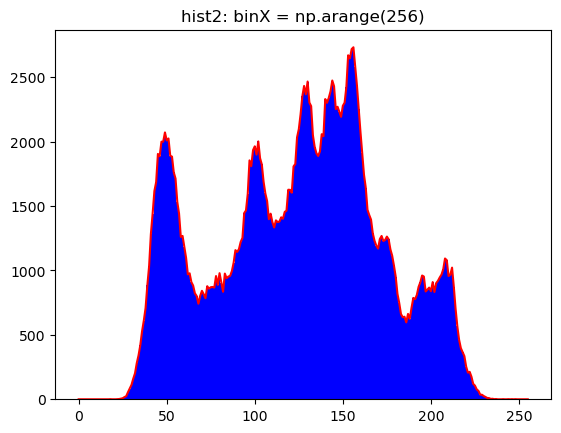

In [57]:
# 0504.py
import cv2
import numpy as np
from   matplotlib import pyplot as plt

src = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)

hist1 = cv2.calcHist(images=[src], channels=[0], mask=None,
                    histSize=[32], ranges=[0, 256])

hist2 = cv2.calcHist(images=[src], channels=[0], mask=None,
                    histSize=[256], ranges=[0, 256])
#1
hist1 = hist1.flatten()
hist2 = hist2.flatten()

#2
plt.title('hist1: binX = np.arange(32)')
plt.plot(hist1, color='r')
binX = np.arange(32)

plt.bar(binX, hist1, width=1, color='b')
plt.show()

#3
plt.title('hist1: binX = np.arange(32)*8')
binX = np.arange(32)*8
plt.plot(binX, hist1, color='r')
plt.bar(binX, hist1, width=8, color='b')
plt.show()

#4
plt.title('hist2: binX = np.arange(256)')
plt.plot(hist2, color='r')
binX = np.arange(256)
plt.bar(binX, hist2, width=1, color='b')
plt.show()


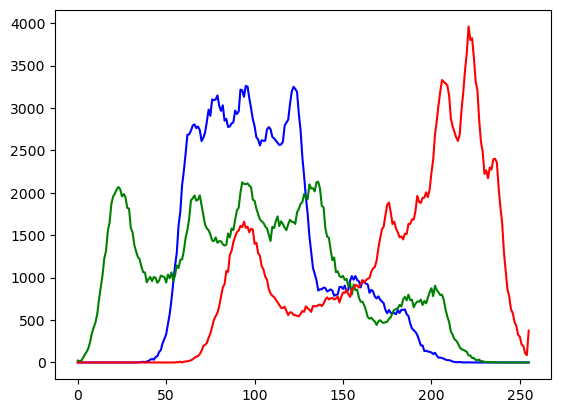

In [58]:
# 0505.py
import cv2
import numpy as np
from   matplotlib import pyplot as plt

src = cv2.imread('./data/lena.jpg')
histColor = ('b', 'g', 'r')
for i in range(3):
    hist = cv2.calcHist(images=[src], channels=[i], mask=None,
                    histSize=[256], ranges=[0, 256])
    plt.plot(hist, color = histColor[i])    
plt.show()


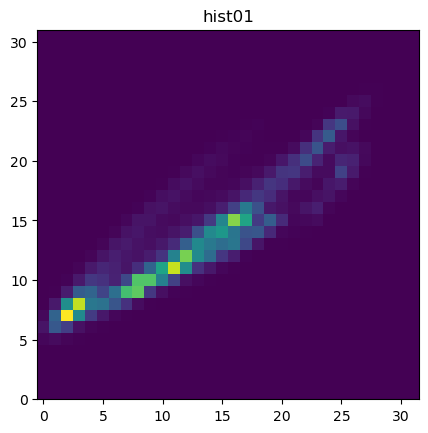

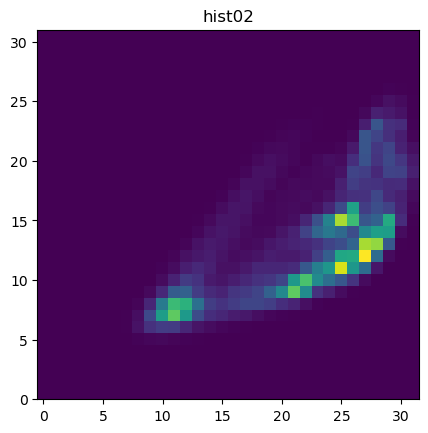

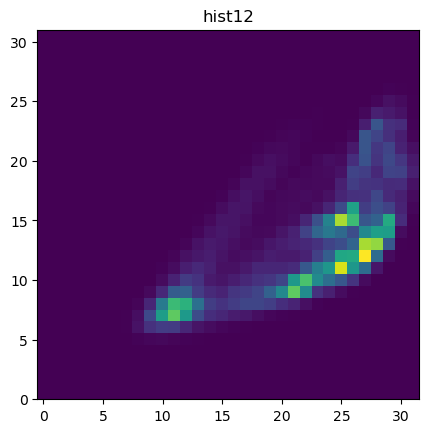

In [59]:
# 0506.py
import cv2
from   matplotlib import pyplot as plt

bgr = cv2.imread('./data/lena.jpg')
##hsv    = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

#1
hist01 = cv2.calcHist([bgr], [0,1], None,
	[32, 32], [0, 256, 0, 256])
##cv2.normalize(hist01, hist01, 0, 1, cv2.NORM_MINMAX)
##fig = plt.figure()
##fig.canvas.set_window_title('2D Histogram')

plt.title('hist01')
plt.ylim(0, 31)
plt.imshow(hist01, interpolation = "nearest")
plt.show()

#2
hist02 = cv2.calcHist([bgr], [0,2], None,
	[32, 32], [0, 256, 0, 256])
plt.title('hist02')
plt.ylim(0, 31)
plt.imshow(hist02, interpolation = "nearest")
plt.show()

#3
hist12 = cv2.calcHist([bgr], [1,2], None,
	[32, 32], [0, 256, 0, 256])
plt.title('hist12')
plt.ylim(0, 31)
plt.imshow(hist02, interpolation = "nearest")
plt.show()


In [60]:
# 0507.py
import cv2
import numpy as np

src = np.array([[0, 0, 0, 0],
              [1, 1, 3, 5],
              [6, 1, 1, 3],
              [4, 3, 1, 7]
              ], dtype=np.uint8)

hist = cv2.calcHist(images=[src], channels=[0], mask=None,
                    histSize=[4], ranges=[0, 8])
print('hist = ', hist)

backP = cv2.calcBackProject([src], [0], hist, [0, 8], scale=1)
print('backP = ', backP)


hist =  [[9.]
 [3.]
 [2.]
 [2.]]
backP =  [[9 9 9 9]
 [9 9 3 2]
 [2 9 9 3]
 [2 3 9 2]]


In [61]:
# 0508.py
import cv2
import numpy as np

#1
src = cv2.imread('./data/fruits.jpg')
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

#2
roi = cv2.selectROI(src)
print('roi =', roi)
roi_h = h[roi[1]:roi[1]+roi[3], roi[0]:roi[0]+roi[2]]
hist = cv2.calcHist([roi_h], [0], None,[64], [0, 256])
backP= cv2.calcBackProject([h.astype(np.float32)], [0], hist,[0, 256],scale=1.0)
##minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(backP)
##T = maxVal -1 # threshold

#3
hist = cv2.sort(hist, cv2.SORT_EVERY_COLUMN+cv2.SORT_DESCENDING)
k = 1 
T = hist[k][0] -1 # threshold
print('T =', T)
ret, dst = cv2.threshold(backP, T, 255, cv2.THRESH_BINARY)

cv2.imshow('dst',  dst)
cv2.waitKey()    
cv2.destroyAllWindows()


roi = (0, 0, 0, 0)
T = -1.0


d1(H1, H2, CORREL) = 0.5738741675175191
d2(H1, H2, CHISQR)= 55.06495312343422
d3(H1, H2, INTERSECT)= 0.4893199909856776
d4(H1, H2, BHATTACHARYYA)= 0.4875176586666531


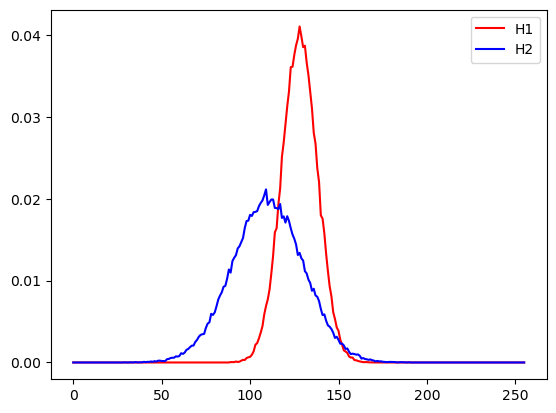

In [62]:
# 0509.py
import cv2
import numpy as np
import time
from   matplotlib import pyplot as plt

#1
nPoints = 100000
pts1 = np.zeros((nPoints, 1), dtype=np.uint16)
pts2 = np.zeros((nPoints, 1), dtype=np.uint16)

cv2.setRNGSeed(int(time.time()))
cv2.randn(pts1, mean=(128), stddev=(10))
cv2.randn(pts2, mean=(110), stddev=(20))            

#2
H1 = cv2.calcHist(images=[pts1], channels=[0], mask=None,
                    histSize=[256], ranges=[0, 256])
cv2.normalize(H1, H1, 1, 0, cv2.NORM_L1)
plt.plot(H1, color='r', label='H1')

H2 = cv2.calcHist(images=[pts2], channels=[0], mask=None,
                    histSize=[256], ranges=[0, 256])
cv2.normalize(H2, H2, 1, 0, cv2.NORM_L1)

#3
d1 = cv2.compareHist(H1, H2, cv2.HISTCMP_CORREL)
d2 = cv2.compareHist(H1, H2, cv2.HISTCMP_CHISQR)
d3 = cv2.compareHist(H1, H2, cv2.HISTCMP_INTERSECT)
d4 = cv2.compareHist(H1, H2, cv2.HISTCMP_BHATTACHARYYA)
print('d1(H1, H2, CORREL) =',       d1)
print('d2(H1, H2, CHISQR)=',        d2)
print('d3(H1, H2, INTERSECT)=',     d3)
print('d4(H1, H2, BHATTACHARYYA)=', d4)

plt.plot(H2, color='b', label='H2')
plt.legend(loc='best')
plt.show()


EMD(S1, S2, DIST_L1) = 18.264339447021484
EMD(S1, S2, DIST_L2) = 18.264339447021484
EMD(S1, S2, DIST_C) = 18.264339447021484


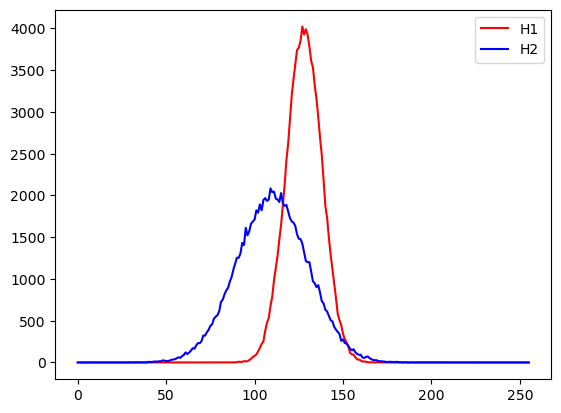

In [63]:
# 0510.py
import cv2
import numpy as np
import time
from   matplotlib import pyplot as plt

#1
nPoints = 100000
pts1 = np.zeros((nPoints, 1), dtype=np.uint16)
pts2 = np.zeros((nPoints, 1), dtype=np.uint16)

cv2.setRNGSeed(int(time.time()))
cv2.randn(pts1, mean=(128), stddev=(10))
cv2.randn(pts2, mean=(110), stddev=(20))            

#2
H1 = cv2.calcHist(images=[pts1], channels=[0], mask=None,
                    histSize=[256], ranges=[0, 256])
##cv2.normalize(H1, H1, norm_type=cv2.NORM_L1)

H2 = cv2.calcHist(images=[pts2], channels=[0], mask=None,
                    histSize=[256], ranges=[0, 256])
##cv2.normalize(H2, H2, norm_type=cv2.NORM_L1)

#3
S1 = np.zeros((H1.shape[0], 2), dtype=np.float32)
S2 = np.zeros((H1.shape[0], 2), dtype=np.float32)
##S1[:, 0] = H1[:, 0]
##S2[:, 0] = H2[:, 0]
for i in range(S1.shape[0]):
    S1[i, 0] = H1[i,0]
    S2[i, 0] = H2[i,0]
    S1[i, 1] = i
    S2[i, 1] = i

emd1, lowerBound, flow = cv2.EMD(S1, S2, cv2.DIST_L1)
print('EMD(S1, S2, DIST_L1) =',  emd1)

emd2, lowerBound, flow = cv2.EMD(S1, S2, cv2.DIST_L2)
print('EMD(S1, S2, DIST_L2) =',  emd2)

emd3, lowerBound, flow = cv2.EMD(S1, S2, cv2.DIST_C) 
print('EMD(S1, S2, DIST_C) =',  emd3)

plt.plot(H1, color='r', label='H1')
plt.plot(H2, color='b', label='H2')
plt.legend(loc='best')
plt.show()


In [64]:
# 0511.py
import cv2
import numpy as np

src = np.array([[2, 2, 4, 4],
                [2, 2, 4, 4],
                [4, 4, 4, 4],
                [4, 4, 4, 4]
              ], dtype=np.uint8)
#1
dst = cv2.equalizeHist(src)
print('dst =', dst)

#2
'''
ref: https://docs.opencv.org/master/d5/daf/tutorial_py_histogram_equalization.html
'''
##hist = cv2.calcHist(images = [src], channels = [0], mask = None,
##                    histSize = [256], ranges = [0, 256])
hist,bins = np.histogram(src.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_m = np.ma.masked_equal(cdf, 0) # cdf에서 0을 True 마스킹  
T = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
T = np.ma.filled(T, 0).astype('uint8') # 마스킹을 0으로 채우기 
dst2 = T[src] # dst2 == dst
#print('dst2 =', dst2)


dst = [[  0   0 255 255]
 [  0   0 255 255]
 [255 255 255 255]
 [255 255 255 255]]


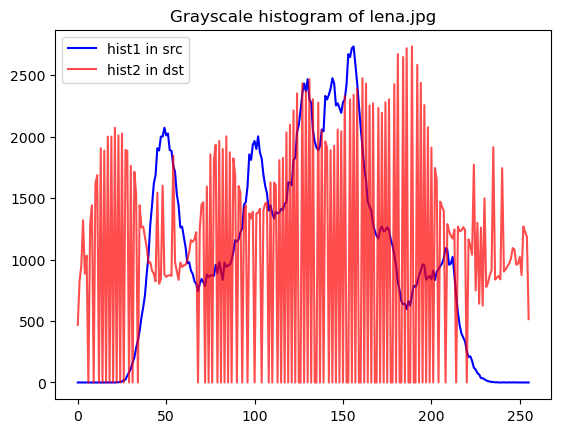

In [65]:
# 0512.py
import cv2
import numpy as np
from   matplotlib import pyplot as plt

src = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)
dst = cv2.equalizeHist(src)
cv2.imshow('dst',  dst)
cv2.waitKey()    
cv2.destroyAllWindows()

plt.title('Grayscale histogram of lena.jpg')

hist1 = cv2.calcHist(images=[src], channels=[0], mask=None,
                    histSize=[256], ranges=[0, 256])
plt.plot(hist1, color='b', label='hist1 in src')

hist2 = cv2.calcHist(images=[dst], channels=[0], mask=None,
                    histSize=[256], ranges=[0, 256])
plt.plot(hist2, color='r', alpha=0.7, label='hist2 in dst')
plt.legend(loc='best')
plt.show()


In [66]:
# 0513.py
import cv2
import numpy as np

src = cv2.imread('./data/lena.jpg')
cv2.imshow('src',  src)

#1
hsv    = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

v2 = cv2.equalizeHist(v)
hsv2 = cv2.merge([h, s, v2])
dst    = cv2.cvtColor(hsv2, cv2.COLOR_HSV2BGR)
cv2.imshow('dst',  dst)

#2
yCrCv = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
y, Cr, Cv = cv2.split(yCrCv)

y2 = cv2.equalizeHist(y)
yCrCv2 = cv2.merge([y2, Cr, Cv])
dst2    = cv2.cvtColor(yCrCv2, cv2.COLOR_YCrCb2BGR)

cv2.imshow('dst2',  dst2)
cv2.waitKey()    
cv2.destroyAllWindows()


In [67]:
# 0514.py
import cv2
import numpy as np

src = np.array([[2, 2, 2, 2, 0,   0,   0,   0],
                [2, 1, 1, 2, 0,   0,   0,   0],
                [2, 1, 1, 2, 0,   0,   0,   0],
                [2, 2, 2, 2, 0,   0,   0,   0],
                [0, 0, 0, 0, 255, 255, 255, 255],
                [0, 0, 0, 0, 255, 1,   1,   255],
                [0, 0, 0, 0, 255, 1,   1,   255],
                [0, 0, 0, 0, 255, 255, 255, 255]], dtype=np.uint8)

#1
clahe = cv2.createCLAHE(clipLimit=40, tileGridSize=(1,1))
dst = clahe.apply(src)
print("dst=\n", dst)

#2
clahe2 = cv2.createCLAHE(clipLimit=40, tileGridSize=(2,2))
dst2 = clahe2.apply(src)
print("dst2=\n", dst2)


dst=
 [[116 116 116 116  44  44  44  44]
 [116  76  76 116  44  44  44  44]
 [116  76  76 116  44  44  44  44]
 [116 116 116 116  44  44  44  44]
 [ 44  44  44  44 255 255 255 255]
 [ 44  44  44  44 255  76  76 255]
 [ 44  44  44  44 255  76  76 255]
 [ 44  44  44  44 255 255 255 255]]
dst2=
 [[ 80  80  80  72  32  40  48  48]
 [ 80  48  48  72  32  40  48  48]
 [ 80  48  48  72  32  40  48  48]
 [ 72  72  72  66  32  36  40  40]
 [ 32  32  32  32 255 255 255 255]
 [ 40  40  40  36 255  48  48 255]
 [ 48  48  48  40 255  48  48 255]
 [ 48  48  48  40 255 255 255 255]]


In [68]:
#0515.py
'''
ref1: https://github.com/opencv/opencv/blob/master/modules/imgproc/src/clahe.cpp#L157
ref2:http://www.realtimerendering.com/resources/GraphicsGems/gemsiv/clahe.c
ref3:https://gist.github.com/sadimanna/52c320ce5c49e200ce398f800d39a2c1#file-clahe-py

'''
import cv2
import numpy as np

#1
src = np.array([[2, 2, 2, 2, 0,   0,   0,   0],
                [2, 1, 1, 2, 0,   0,   0,   0],
                [2, 1, 1, 2, 0,   0,   0,   0],
                [2, 2, 2, 2, 0,   0,   0,   0],
                [0, 0, 0, 0, 255, 255, 255, 255],
                [0, 0, 0, 0, 255, 1,   1,   255],
                [0, 0, 0, 0, 255, 1,   1,   255],
                [0, 0, 0, 0, 255, 255, 255, 255]], dtype=np.uint8)

#2
def interpolate(sub_image, UL,UR,BL,BR):
    dst = np.zeros(sub_image.shape)
    sY, sX = sub_image.shape
    area = sX*sY
    #print("sX={}, sY={}".format(sX, sY))

    for y in range(sY):
        invY = sY-y
        for x in range(sX):
            invX = sX-x
            val = sub_image[y, x].astype(int)
            dst[y,x] = np.floor((invY*(invX*UL[val] + x*UR[val])+\
                                    y*(invX*BL[val] + x*BR[val]) )/area)          
    return dst

#3
def CLAHE(src, clipLimit = 40.0, tileX = 8, tileY = 8):

#3-1
    histSize = 256    
    tileSizeX = src.shape[1]//tileX
    tileSizeY = src.shape[0]//tileY
    tileArea  = tileSizeX*tileSizeY
    clipLimit = max(clipLimit*tileArea/histSize, 1)
    lutScale = (histSize - 1) / tileArea
    print("clipLimit=", clipLimit)

    LUT = np.zeros((tileY, tileX, histSize))
    dst = np.zeros_like(src)
    #print("tileX={}, tileY={}".format(tileX, tileY))

#3-2: sublocks, tiles
    for iy in range(tileY):
        for ix in range(tileX):
#3-2-1
            y = iy*tileSizeY
            x = ix*tileSizeX
            roi = src[y:y+tileSizeY, x:x+tileSizeX] # tile
            
            tileHist, bins = np.histogram(roi, histSize,[0,256])
            #tileHist=cv2.calcHist([roi],[0],None,[histSize],[0,256]).astype(np.int)
            #tileHist = tileHist.flatten()                                           
            #print("tileHist[{},{}]=\n{}".format(iy, ix, tileHist))

#3-2-2                  
            if clipLimit > 0: # clip histogram
                clipped = 0
                for i in range(histSize):
                    if tileHist[i]>clipLimit:
                        clipped += tileHist[i] - clipLimit
                        tileHist[i] = clipLimit
        
                # redistribute clipped pixels    
                redistBatch = int(clipped/ histSize)
                residual = clipped - redistBatch * histSize
                
                for i in range(histSize):
                    tileHist[i] += redistBatch
                if residual != 0:
                    residualStep = max(int(histSize/residual), 1)
                    for i in range(0, histSize, residualStep):
                        if residual> 0:
                            tileHist[i] += 1
                            residual -= 1                            
            #print("redistributed[{},{}]=\n{}".format(iy, ix, tileHist))
            
#3-2-3:     calculate Lookup table for equalizing
            cdf = tileHist.cumsum()            
            tileLut = np.round(cdf*lutScale)
            LUT[iy, ix] = tileLut          
#3-3            
    # bilinear interpolation 
    y = 0
    for i in range(tileY+1):
        if i==0:  # top row
            subY = int(tileSizeY/2)
            yU = yB = 0
        elif i==tileY: # bottom row 
            subY = int(tileSizeY/2)
            yU= yB = tileY-1
        else:
            subY = tileSizeY
            yU = i-1
            yB = i
        #print("i={}, yU={}, yB={}, subY={}".format(i, yU, yB, subY))
        
        x = 0
        for j in range(tileX+1):
            if j==0: # left column
                subX = tileSizeX//2
                xL = xR = 0
            elif j==tileX: # right column
                subX = tileSizeX//2
                xL = xR = tileX-1
            else:
                subX = tileSizeX
                xL = j-1
                xR = j
            #print(" j={}, xL={}, xR={}, subX={}".format(j, xL, xR, subX))
            
            UL = LUT[yU,xL]
            UR = LUT[yU,xR]
            BL = LUT[yB,xL]
            BR = LUT[yB,xR]
            
            roi = src[y:y+subY, x:x+subX] 
            dst[y:y+subY, x:x+subX] = interpolate(roi,UL,UR,BL,BR)
            x += subX
        y += subY        
    return  dst

#4 
##dst = CLAHE(src, clipLimit= 40.0, tileX= 1, tileY= 1)
##print("dst=", dst)
dst2 = CLAHE(src, clipLimit= 40.0, tileX= 2, tileY= 2)
print("dst=\n", dst2)


clipLimit= 2.5
dst=
 [[ 80  80  80  72  32  40  48  48]
 [ 80  48  48  72  32  40  48  48]
 [ 80  48  48  72  32  40  48  48]
 [ 72  72  72  66  32  36  40  40]
 [ 32  32  32  32 247 247 247 247]
 [ 40  40  40  36 247  48  48 243]
 [ 48  48  48  40 247  48  48 239]
 [ 48  48  48  40 247 243 239 239]]


In [69]:
# 0516.py
import cv2
import numpy as np 
#1
src = cv2.imread('./data/tsukuba_l.png', cv2.IMREAD_GRAYSCALE)
cv2.imshow('src', src)

#2
dst = cv2.equalizeHist(src)
cv2.imshow('dst', dst)

#3
clahe2 = cv2.createCLAHE(clipLimit=40, tileGridSize=(1,1))
dst2 = clahe2.apply(src)
cv2.imshow('dst2', dst2)

#4
clahe3 = cv2.createCLAHE(clipLimit=40, tileGridSize=(8,8))
dst3 = clahe3.apply(src)
cv2.imshow('dst3', dst3)

cv2.waitKey()    
cv2.destroyAllWindows()


In [70]:
# 0601.py
import cv2
import numpy as np

src = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)

dst1= cv2.boxFilter(src, ddepth=-1, ksize=(11, 11))
dst2 = cv2.boxFilter(src, ddepth=-1, ksize=(21, 21))

dst3 = cv2.bilateralFilter(src, d=11, sigmaColor=10, sigmaSpace=10)
dst4 = cv2.bilateralFilter(src, d=-1, sigmaColor=10, sigmaSpace=10)

cv2.imshow('dst1',  dst1)    
cv2.imshow('dst2',  dst2)
cv2.imshow('dst3',  dst3)
cv2.imshow('dst4',  dst4)
cv2.waitKey()    
cv2.destroyAllWindows()


In [71]:
# 0602.py
import cv2
import numpy as np

src = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)

dst1= cv2.medianBlur(src, ksize = 7)
dst2 = cv2.blur(src, ksize=(7, 7))
dst3 = cv2.GaussianBlur(src, ksize=(7, 7), sigmaX=0.0)
dst4 = cv2.GaussianBlur(src, ksize=(7, 7), sigmaX=10.0)

cv2.imshow('dst1',  dst1)    
cv2.imshow('dst2',  dst2)
cv2.imshow('dst3',  dst3)
cv2.imshow('dst4',  dst4)
cv2.waitKey()    
cv2.destroyAllWindows()


In [72]:
# 0603.py
import cv2
import numpy as np

src = cv2.imread('./data/rect.jpg', cv2.IMREAD_GRAYSCALE)
#1
gx = cv2.Sobel(src, cv2.CV_32F, 1, 0, ksize = 3)
gy = cv2.Sobel(src, cv2.CV_32F, 0, 1, ksize = 3)

#2
dstX = cv2.sqrt(np.abs(gx))
dstX = cv2.normalize(dstX, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

#3
dstY = cv2.sqrt(np.abs(gy))
dstY = cv2.normalize(dstY, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

#4
mag   = cv2.magnitude(gx, gy)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(mag)
print('mag:', minVal, maxVal, minLoc, maxLoc)

dstM = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

cv2.imshow('src',  src)
cv2.imshow('dstX',  dstX)    
cv2.imshow('dstY',  dstY)
cv2.imshow('dstM',  dstM)
cv2.waitKey()
cv2.destroyAllWindows()


mag: 0.0 1053.8966064453125 (0, 0) (356, 328)


In [74]:
# 0604.py
import cv2
import numpy as np
from   matplotlib import pyplot as plt

src = cv2.imread('./data/rect1.jpg', cv2.IMREAD_GRAYSCALE)
##src = cv2.imread('./data/line.png', cv2.IMREAD_GRAYSCALE)
cv2.imshow('src',  src)

#1
gx = cv2.Sobel(src, cv2.CV_32F, 1, 0, ksize = 3)
gy = cv2.Sobel(src, cv2.CV_32F, 0, 1, ksize = 3)

mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(angle)
print('angle:', minVal, maxVal, minLoc, maxLoc)

#2
ret, edge = cv2.threshold(mag, 100, 255, cv2.THRESH_BINARY)
edge = edge.astype(np.uint8)
cv2.imshow('edge',  edge)

#3
height, width = mag.shwidth):
        if edge[y, x] != 0: # if mag[y, x] > 100: # edge
            if angle[y, x] ==   0:
                angleM[y, x] =  (0, 0, 255)   # red
      ape[:2]
angleM = np.full((height,width, 3), (255, 255, 255), dtype= np.uint8)
for y in range(height):
    for x in range(
      elif angle[y, x] == 90:
                 angleM[y, x] = (0, 255, 0)   # green
            elif angle[y, x] ==180:
                 angleM[y, x] = (255, 0, 0)   # blue                 
            elif angle[y, x] ==270:
                 angleM[y, x] = (0, 255, 255) # yellow
            else:
                angleM[y, x] =  (128, 128, 128) # gray                
cv2.imshow('angleM',  angleM)
##cv2.waitKey()    
##cv2.destroyAllWindows()

#4
hist = cv2.calcHist(images=[angle], channels=[0], mask=edge,
                    histSize=[360], ranges=[0, 360])

hist = hist.flatten()
##plt.title('hist: binX = np.arange(360)')
plt.plot(hist, color='r')
binX = np.arange(360)
plt.bar(binX, hist, width=1, color='b')
plt.show()


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 34)

In [75]:
# 0605.py
import cv2
import numpy as np

#1
src = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)
blur= cv2.GaussianBlur(src, ksize=(7, 7), sigmaX=0.0)
cv2.imshow('src',  src)
cv2.imshow('blur', blur)

#2
lap  = cv2.Laplacian(src, cv2.CV_32F)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(lap)
print('lap:', minVal, maxVal, minLoc, maxLoc)
dst = cv2.convertScaleAbs(lap)
dst = cv2.normalize(dst, None, 0, 255, cv2.NORM_MINMAX)
cv2.imshow('lap',  lap)
cv2.imshow('dst',  dst)

#3
lap2 = cv2.Laplacian(blur, cv2.CV_32F)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(lap2)
print('lap2:', minVal, maxVal, minLoc, maxLoc)
dst2 = cv2.convertScaleAbs(lap2)
dst2 = cv2.normalize(dst2, None, 0, 255, cv2.NORM_MINMAX)

cv2.imshow('lap2',  lap2)
cv2.imshow('dst2',  dst2)

cv2.waitKey()    
cv2.destroyAllWindows()


lap: -239.0 189.0 (404, 181) (221, 287)
lap2: -35.0 30.0 (180, 435) (367, 449)


In [76]:
# 0606.py
import cv2
import numpy as np

#1
#src  = cv2.imread('./data/A.bmp', cv2.IMREAD_GRAYSCALE)
src  = cv2.imread('./data/rect.jpg', cv2.IMREAD_GRAYSCALE)
#src  = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)
blur = cv2.GaussianBlur(src, ksize=(7, 7), sigmaX=0.0)
lap = cv2.Laplacian(blur, cv2.CV_32F,3)

##ret, edge = cv2.threshold(np.abs(lap), 10, 255, cv2.THRESH_BINARY)
##edge = edge.astype(np.uint8)
##cv2.imshow('edge',  edge)

#2
def SGN(x):
    if x >= 0:
        sign = 1
    else:
        sign = -1
    return sign

def zeroCrossing(lap):
    height, width = lap.shape
    Z = np.zeros(lap.shape, dtype=np.uint8)    
    for y in range(1, height-1):
        for x in range(1,width-1):
            neighbors=[lap[y-1,x], lap[y+1,x], lap[y,x-1], lap[y,x+1],
                       lap[y-1,x-1], lap[y-1,x+1], lap[y+1,x-1], lap[y+1,x+1]]                       
            mValue= min(neighbors)
            if SGN(lap[y,x]) != SGN(mValue):
                Z[y, x] = 255
    return Z
edgeZ = zeroCrossing(lap)
cv2.imshow('Zero Crossing',  edgeZ)
cv2.waitKey()    
cv2.destroyAllWindows()


In [77]:
# 0607.py
import cv2
import numpy as np

src  = cv2.imread('./data/rect.jpg', cv2.IMREAD_GRAYSCALE)
##src  = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)

#1
kx, ky = cv2.getDerivKernels(1, 0, ksize=3)
sobelX = ky.dot(kx.T)
##sobelX = np.array([[-1,  0,  1],
##                   [-2,  0,  2],
##                   [-1,  0,  1]], dtype=np.float32)

print('kx=', kx)
print('ky=', ky)
print('sobelX=', sobelX)
gx = cv2.filter2D(src, cv2.CV_32F, sobelX)
##gx = cv2.sepFilter2D(src, cv2.CV_32F, kx, ky)

#2
kx, ky = cv2.getDerivKernels(0, 1, ksize=3)
sobelY = ky.dot(kx.T)
##sobelY = np.array([[-1, -2, -1],
##                   [ 0,  0,  0],
##                   [ 1,  2,  1]], dtype=np.float32)

print('kx=', kx)
print('ky=', ky)
print('sobelY=', sobelY)
gy = cv2.filter2D(src, cv2.CV_32F, sobelY)
##gy = cv2.sepFilter2D(src, cv2.CV_32F, kx, ky)

#3
mag   = cv2.magnitude(gx, gy)
ret, edge = cv2.threshold(mag, 100, 255, cv2.THRESH_BINARY)

cv2.imshow('edge',  edge)
cv2.waitKey()    
cv2.destroyAllWindows()


kx= [[-1.]
 [ 0.]
 [ 1.]]
ky= [[1.]
 [2.]
 [1.]]
sobelX= [[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]
kx= [[1.]
 [2.]
 [1.]]
ky= [[-1.]
 [ 0.]
 [ 1.]]
sobelY= [[-1. -2. -1.]
 [ 0.  0.  0.]
 [ 1.  2.  1.]]


In [78]:
# 0608.py
import cv2
import numpy as np

src  = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)

#1
def logFilter(ksize=7):
    k2 = ksize//2
    sigma = 0.3*(k2-1) + 0.8
    print('sigma=', sigma)
    LoG = np.zeros((ksize, ksize), dtype=np.float32)
    for y in range(-k2, k2+1):
        for x in range(-k2, k2+1):
            g = -(x*x+y*y)/(2.0*sigma**2.0)
            LoG[y+k2, x+k2] = -(1.0+g)*np.exp(g)/(np.pi*sigma**4.0)
    return LoG

#2
kernel = logFilter() #7, 15, 31, 51
LoG = cv2.filter2D(src, cv2.CV_32F, kernel)
cv2.imshow('LoG',  LoG)

#3
def zeroCrossing2(lap, thresh=0.01):
    height, width = lap.shape
    Z = np.zeros(lap.shape, dtype=np.uint8)    
    for y in range(1, height-1):
        for x in range(1,width-1):
            neighbors=[lap[y-1,x],   lap[y+1,x],   lap[y,x-1],   lap[y,x+1],
                       lap[y-1,x-1], lap[y-1,x+1], lap[y+1,x-1], lap[y+1,x+1]]
            pos = 0
            neg = 0
            for value in neighbors:
                if value > thresh:
                    pos += 1
                if value < -thresh:  # value < thresh
                    neg += 1
            if pos > 0 and neg > 0:
                Z[y, x] = 255                        
    return Z
edgeZ = zeroCrossing2(LoG)
cv2.imshow('Zero Crossing2',  edgeZ)
cv2.waitKey()    
cv2.destroyAllWindows()


sigma= 1.4


In [79]:
# 0609.py
import cv2
import numpy as np

src   = cv2.imread('./data/morphology.jpg', cv2.IMREAD_GRAYSCALE)
kernel= cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(3,3))
erode = cv2.erode(src,kernel,iterations = 5)
dilate = cv2.dilate(src,kernel,iterations = 5)
erode2= cv2.erode(dilate,kernel,iterations = 7)
##dilate2= cv2.dilate(erode2,kernel,iterations = 2)

cv2.imshow('src',    src)
cv2.imshow('erode',  erode)
cv2.imshow('dilate', dilate)
cv2.imshow('erode2', erode2)
##cv2.imshow('dilate2',    dilate2)
cv2.waitKey()
cv2.destroyAllWindows()


In [80]:
# 0610.py
import cv2
import numpy as np

src   = cv2.imread('./data/morphology.jpg', cv2.IMREAD_GRAYSCALE)
kernel= cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(3,3))
closing = cv2.morphologyEx(src,cv2.MORPH_CLOSE,kernel,iterations = 5)
opening = cv2.morphologyEx(closing,cv2.MORPH_OPEN,kernel,iterations = 5)
gradient = cv2.morphologyEx(opening,cv2.MORPH_GRADIENT,kernel)
#gradient=cv2.morphologyEx(opening,cv2.MORPH_GRADIENT,kernel, iterations=5)

tophat = cv2.morphologyEx(src,cv2.MORPH_TOPHAT,kernel,iterations = 5)
balckhat = cv2.morphologyEx(src,cv2.MORPH_BLACKHAT,kernel,iterations = 5)

cv2.imshow('opening',  opening)
cv2.imshow('closing',  closing)
cv2.imshow('gradient', gradient)
cv2.imshow('tophat',   tophat)
cv2.imshow('balckhat', balckhat)
cv2.waitKey()
cv2.destroyAllWindows()


In [81]:
# 0611.py
"""
ref: https://gist.github.com/jsheedy/3913ab49d344fac4d02bcc887ba4277d
ref: http://felix.abecassis.me/2011/09/opencv-morphological-skeleton/
"""
import cv2
import numpy as np

#1
src   = cv2.imread('./data/T.jpg', cv2.IMREAD_GRAYSCALE)
##src   = cv2.imread('alphabet.bmp', cv2.IMREAD_GRAYSCALE)
##src = cv2.bitwise_not(src)

ret, A = cv2.threshold(src, 128, 255, cv2.THRESH_BINARY)
skel_dst = np.zeros(src.shape, np.uint8)

#2
shape1=cv2.MORPH_CROSS
shape2=cv2.MORPH_RECT
B= cv2.getStructuringElement(shape=shape1, ksize=(3,3))
done = True
while done:   
    erode  = cv2.erode(A, B)
##    opening = cv2.dilate(erode,B)
    opening = cv2.morphologyEx(erode, cv2.MORPH_OPEN, B)
    tmp    = cv2.subtract(erode, opening) # cv2.absdiff(erode, opening)
    skel_dst = cv2.bitwise_or(skel_dst, tmp)
    A = erode.copy()
    done = cv2.countNonZero(A) != 0
    
##    cv2.imshow('opening',  opening)
##    cv2.imshow('tmp',  tmp)    
##    cv2.imshow('skel_dst',  skel_dst)
##    cv2.waitKey()

cv2.imshow('src',  src)    
cv2.imshow('skel_dst',  skel_dst)
cv2.waitKey()
cv2.destroyAllWindows()


In [82]:
# 0612.py
import cv2
import numpy as np

src   = cv2.imread('./data/alphabet.bmp', cv2.IMREAD_GRAYSCALE)
tmp_A   = cv2.imread('./data/A.bmp', cv2.IMREAD_GRAYSCALE)
tmp_S   = cv2.imread('./data/S.bmp', cv2.IMREAD_GRAYSCALE)
tmp_b   = cv2.imread('./data/b.bmp', cv2.IMREAD_GRAYSCALE)
dst  = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)  # 출력 표시 영상

#1
R1 = cv2.matchTemplate(src, tmp_A, cv2.TM_SQDIFF_NORMED)
minVal, _, minLoc, _ = cv2.minMaxLoc(R1)
print('TM_SQDIFF_NORMED:', minVal, minLoc)

h, w = tmp_A.shape[:2]
cv2.rectangle(dst, minLoc, (minLoc[0]+w, minLoc[1]+h), (255, 0, 0), 2)

#2
R2 = cv2.matchTemplate(src, tmp_S, cv2.TM_CCORR_NORMED)
_, maxVal, _, maxLoc = cv2.minMaxLoc(R2)
print('TM_CCORR_NORMED:', maxVal, maxLoc)
h, w = tmp_S.shape[:2]
cv2.rectangle(dst, maxLoc, (maxLoc[0]+w, maxLoc[1]+h), (0, 255, 0), 2)

#3
R3 = cv2.matchTemplate(src, tmp_b, cv2.TM_CCOEFF_NORMED)
_, maxVal, _, maxLoc = cv2.minMaxLoc(R3)
print('TM_CCOEFF_NORMED:', maxVal, maxLoc)
h, w = tmp_b.shape[:2]
cv2.rectangle(dst, maxLoc, (maxLoc[0]+w, maxLoc[1]+h), (0, 0, 255), 2)

cv2.imshow('dst',  dst)
cv2.waitKey()
cv2.destroyAllWindows()


TM_SQDIFF_NORMED: 3.929205263375479e-07 (18, 20)
TM_CCORR_NORMED: 1.0 (280, 146)
TM_CCOEFF_NORMED: 1.0 (92, 280)
